#### After running main `<size>_<name>_<transform>_<channel>.ipynb` notebook, use this to regenerate plots as needed.

In [1]:
DATA_NAME = 'approx1e5-pastis-wavelet-green' # size-name-transform-channel
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'group')
master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df.csv"), index_col=GROUP)
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))
GROUPS = sorted(master_df.index)
SAVE_FIGS = False

In [2]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,1829.164000,1651.372800,2019.902600,2.873299,1.840007,4.012415,3180.0,0.34,2.40,0.018359,...,35.389200,0.031293,3.861410e-03,32.846500,0.023339,6.160030e-02,26.705700,0.020186,1.477550e-01,2.674877e-01
3,577.966500,547.148500,610.217350,2.591534,2.004859,3.274253,12720.0,0.36,1.70,0.006825,...,20.485100,0.024938,2.641150e-07,18.002400,0.012832,3.007120e-02,14.353800,0.013594,1.799730e-02,8.724247e-01
4,161.064830,151.595140,170.843120,3.336077,2.644728,4.188527,50880.0,0.36,0.50,0.005365,...,10.065500,0.031150,2.514340e-43,8.851030,0.007245,9.536860e-03,7.208100,0.009629,1.587630e-04,2.320617e-01
5,37.128075,34.705720,39.643353,4.760657,3.808561,5.902313,203520.0,0.40,-0.06,0.002647,...,4.507130,0.034634,1.545600e-212,3.964490,0.007505,2.197220e-10,3.225400,0.010003,4.080280e-18,2.499790e-01
6,7.465013,6.910058,8.046522,6.556909,5.074348,8.726763,814080.0,0.48,-0.50,0.004682,...,1.822190,0.043074,0.000000e+00,1.596520,0.015329,1.336470e-166,1.289160,0.017422,4.447750e-215,6.646855e-12
7,1.416197,1.301939,1.538062,8.566812,6.601404,11.716293,3256320.0,0.77,-0.80,0.011405,...,0.704355,0.051999,0.000000e+00,0.618147,0.024411,0.000000e+00,0.494202,0.025216,0.000000e+00,0.000000e+00
8,0.229009,0.208696,0.252363,11.555227,7.821531,25.041437,13025280.0,2.00,-1.12,0.045556,...,0.261568,0.057127,0.000000e+00,0.229189,0.030158,0.000000e+00,0.179672,0.031616,0.000000e+00,0.000000e+00


In [3]:
rEtaKsstats_dict = pd.read_pickle(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))
group_cdf_df_dict = dict()
for group in master_df.index:
    group_cdf_df = pd.DataFrame(dict(zip(['r', 'eta', 'ksstat'], rEtaKsstats_dict[group])))
    group_cdf_df['variance'] = np.nan_to_num(group_cdf_df.apply(lambda row : variance_prior(row.loc['r'], row.loc['eta']), axis = 1))
    group_cdf_df['kurtosis'] = group_cdf_df.apply(lambda row : kurtosis_prior(row.loc['r'], row.loc['eta']), axis = 1)
    group_cdf_df = add_tests_to_df(cdfs_df=group_cdf_df, group=group, var_kurt_df=master_df, ksstats=group_cdf_df['ksstat']).sort_values(['r', 'eta'])
    group_cdf_df_dict[group] = group_cdf_df

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\

####
Layer  2


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


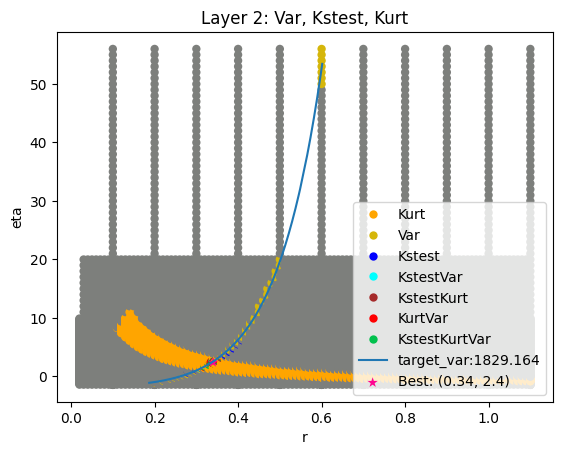

####
Layer  3


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


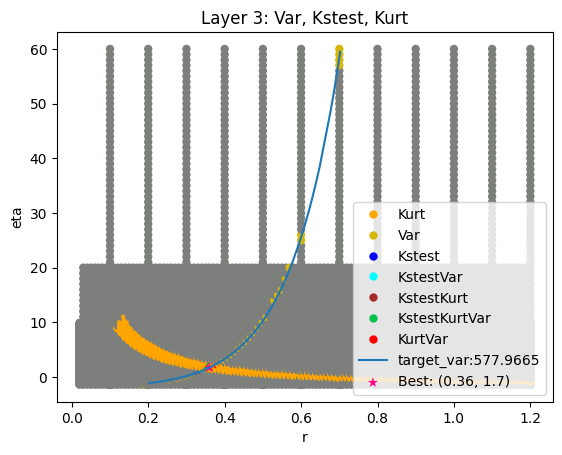

####
Layer  4


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


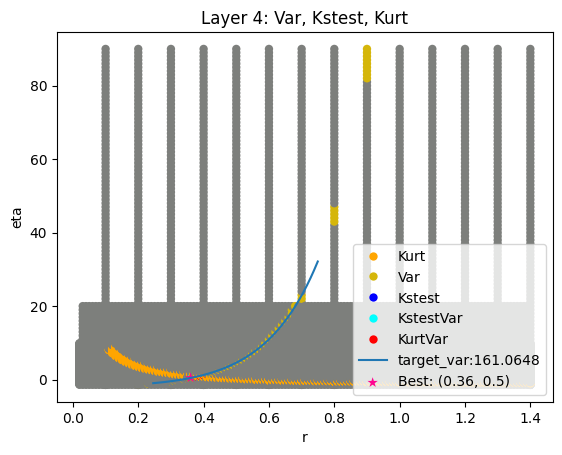

####
Layer  5


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


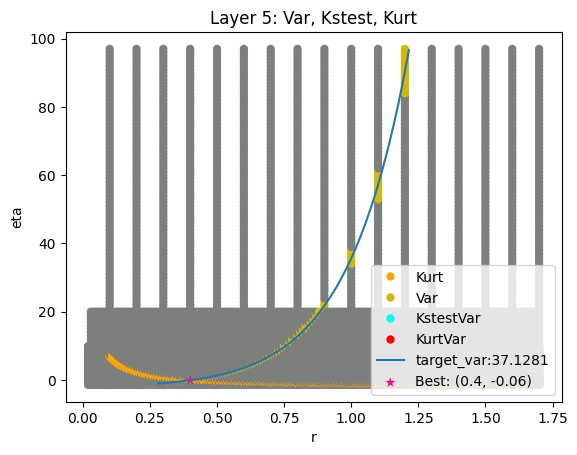

####
Layer  6


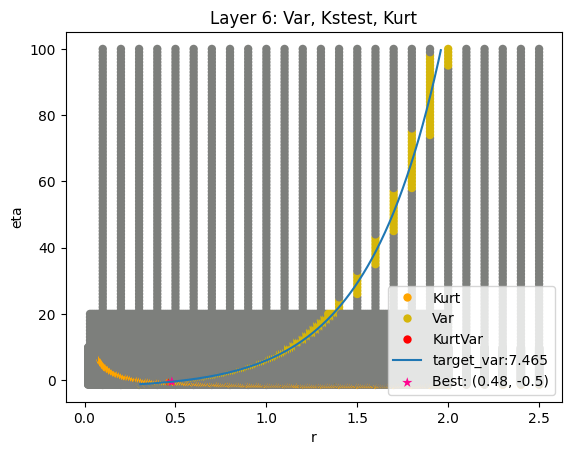

####
Layer  7


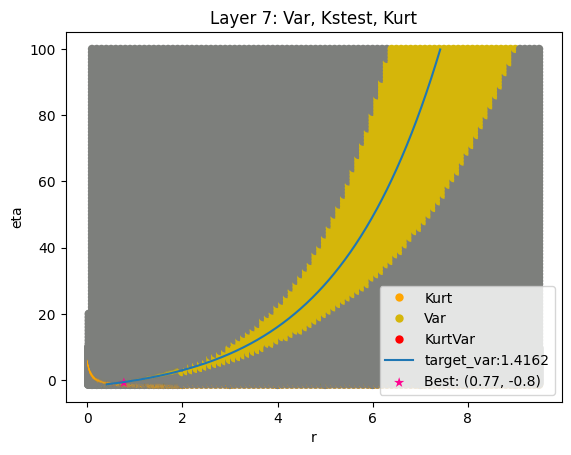

####
Layer  8


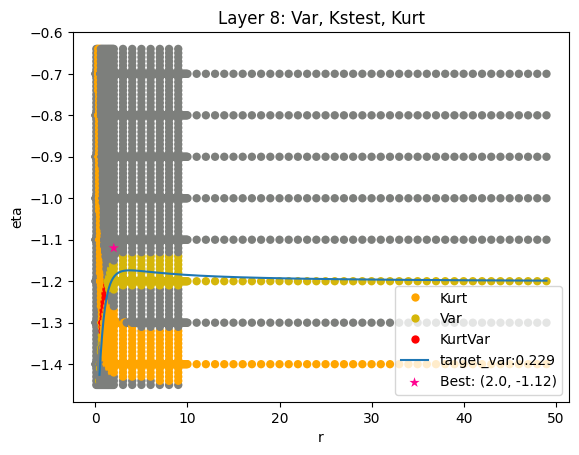

In [4]:
for i, group in enumerate(GROUPS):
    print(f"####\n{GROUP.capitalize()} ", group)
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']
    fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']))
    if SAVE_FIGS:
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

0.01 11.3 0.18999999999999995
0.001 0.6999999999999997 0.019999999999999962


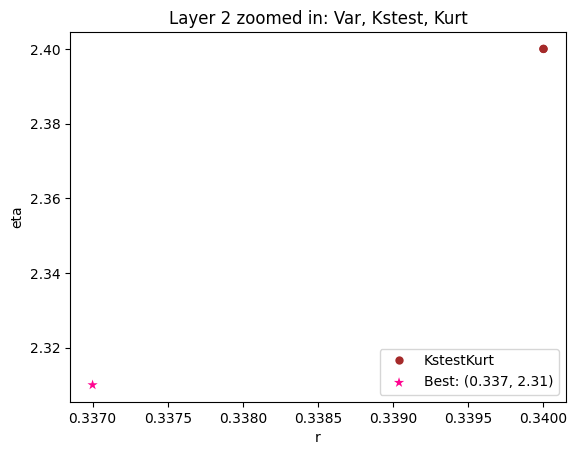

0.01 3.3 0.10999999999999999
0.001 0.18999999999999995 0.007000000000000006


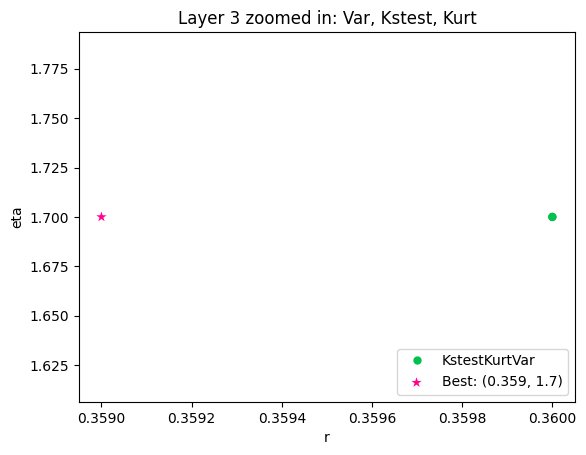

0.01 1.5 0.09999999999999998
0.001 0.08999999999999997 0.007000000000000006


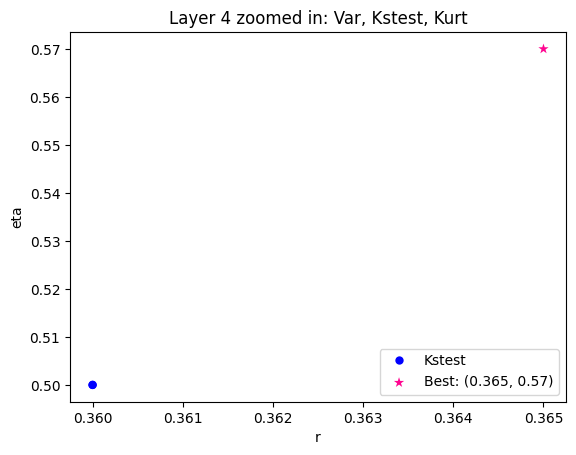

0.01 0.6000000000000001 0.07
0.001 0.016 0.07


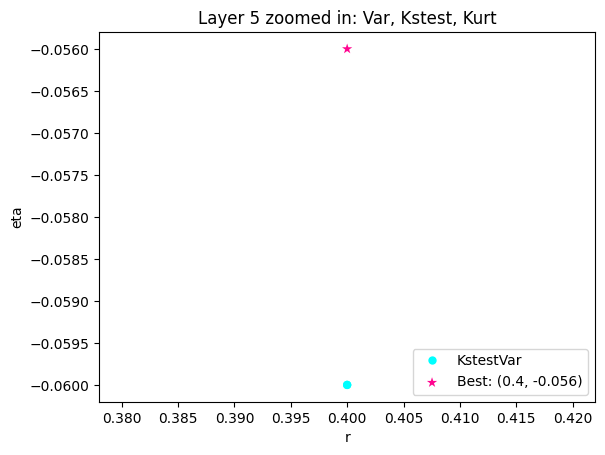

0.01 0.49999999999999994 0.15999999999999998
0.001 0.050000000000000044 0.020000000000000018


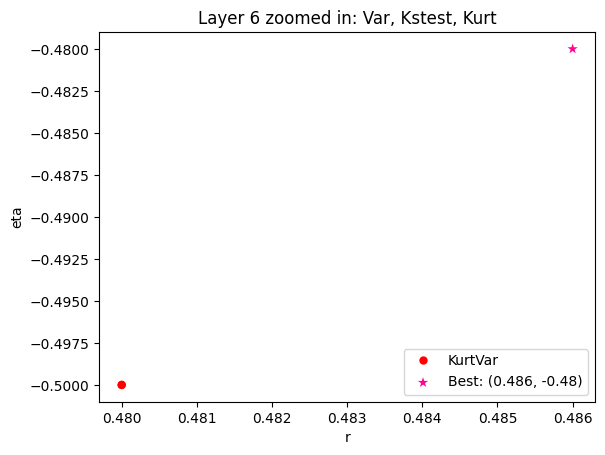

0.01 0.25 0.43999999999999995
0.001 0.020000000000000018 0.020000000000000018


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


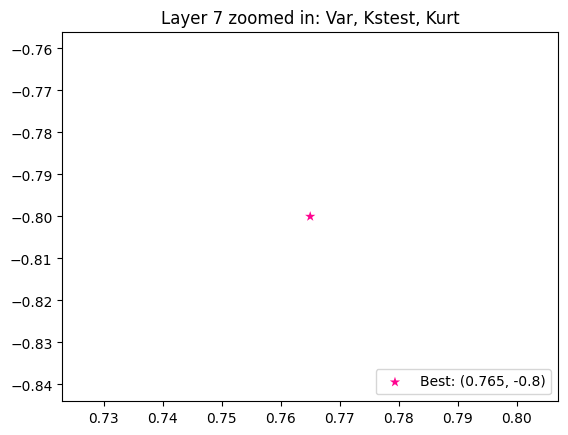

0.01 0.06999999999999984 8.3
0.001 0.009999999999999787 1.5999999999999999


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


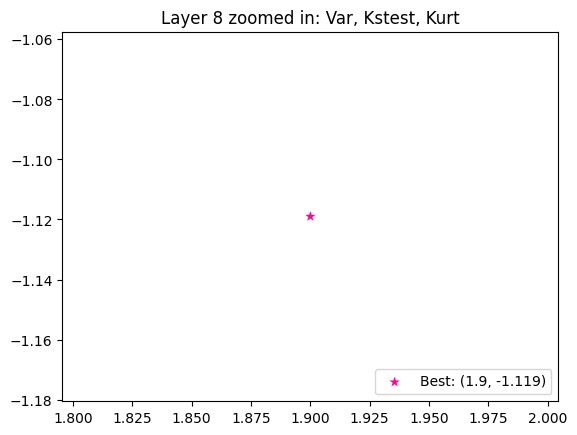

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma,delta_r_best,delta_eta_best
layer,,,,,,,,,,,,,,,,,,,,,
2,1829.164000,1651.372800,2019.902600,2.873299,1.840007,4.012415,3180.0,0.34,2.40,0.018359,...,3.861410e-03,32.846500,0.023339,6.160030e-02,26.705700,0.020186,1.477550e-01,2.674877e-01,0.020,0.700
3,577.966500,547.148500,610.217350,2.591534,2.004859,3.274253,12720.0,0.36,1.70,0.006825,...,2.641150e-07,18.002400,0.012832,3.007120e-02,14.353800,0.013594,1.799730e-02,8.724247e-01,0.007,0.190
4,161.064830,151.595140,170.843120,3.336077,2.644728,4.188527,50880.0,0.36,0.50,0.005365,...,2.514340e-43,8.851030,0.007245,9.536860e-03,7.208100,0.009629,1.587630e-04,2.320617e-01,0.007,0.090
5,37.128075,34.705720,39.643353,4.760657,3.808561,5.902313,203520.0,0.40,-0.06,0.002647,...,1.545600e-212,3.964490,0.007505,2.197220e-10,3.225400,0.010003,4.080280e-18,2.499790e-01,0.070,0.016
6,7.465013,6.910058,8.046522,6.556909,5.074348,8.726763,814080.0,0.48,-0.50,0.004682,...,0.000000e+00,1.596520,0.015329,1.336470e-166,1.289160,0.017422,4.447750e-215,6.646855e-12,0.020,0.050
7,1.416197,1.301939,1.538062,8.566812,6.601404,11.716293,3256320.0,0.77,-0.80,0.011405,...,0.000000e+00,0.618147,0.024411,0.000000e+00,0.494202,0.025216,0.000000e+00,0.000000e+00,0.020,0.020
8,0.229009,0.208696,0.252363,11.555227,7.821531,25.041437,13025280.0,2.00,-1.12,0.045556,...,0.000000e+00,0.229189,0.030158,0.000000e+00,0.179672,0.031616,0.000000e+00,0.000000e+00,1.600,0.010


In [5]:
for group in GROUPS: 
    temp_df = group_cdf_df_dict[group]
    eps = 0.5
    delta_rs = []
    delta_etas = []

    for eps in 10.**np.arange(-2, -4, -1):
        filtered_ksstat_df = temp_df[(temp_df['ksstat'] < temp_df['ksstat'].min() + eps)]
        if filtered_ksstat_df['r'].max() - filtered_ksstat_df['r'].min() > 0:
            delta_r = filtered_ksstat_df['r'].max() - filtered_ksstat_df['r'].min()
            delta_rs.append(delta_r)
        if filtered_ksstat_df['eta'].max() - filtered_ksstat_df['eta'].min() > 0:
            delta_eta = filtered_ksstat_df['eta'].max() - filtered_ksstat_df['eta'].min()
            delta_etas.append(delta_eta)
        print(eps, delta_eta, delta_r)
        #create_scatter_plot(filtered_ksstat_df, 'ksstat')
        
    master_df.loc[group, 'delta_r_best'] = delta_rs[-1]
    master_df.loc[group, 'delta_eta_best'] = delta_etas[-1]

    filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                    (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                    (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                    (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
    
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']
    fig = combo_test_plot(filtered_df, cols, 
                            plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                            best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
    if SAVE_FIGS:
        fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

master_df

In [10]:
delta_etas

[101.45, 101.45, 101.45, 101.45, 101.45]

In [ ]:
for group in GROUPS:
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (master_df.loc[group]['best_r'], master_df.loc[group]['best_eta']), 
                    log_scale = True,
                    group = group,
                    interval = (-1000, 1000))
    if SAVE_FIGS:
        fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)